In [83]:
!pip install pandas numpy matplotlib seaborn scikit-learn #checks if every packages are satisfied if not,then downloads them

# **1.0 Libraries**

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **2.0 Regression Task using Housing Dataset**

# 2.1 Importing dataset from GitHub

In [85]:
#Loading Data
df_housing = pd.read_csv('https://raw.githubusercontent.com/Amoshb/COMP1816-ML-Datasets/refs/heads/main/COMP1816_Housing_Dataset_Regression.csv')

In [86]:
df_housing.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


In [87]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      988 non-null    float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     993 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


# 2.2 Data Preprocessing

In [88]:
#Drop the 'No.' column
df_housing = df_housing.drop(columns=['No.'])

In [89]:
#Handling missing values
# Numerical columns: median imputation
num_imputer = SimpleImputer(strategy='median')

In [90]:
# Categorical column: mode imputation (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')

In [91]:
# Apply imputations
df_housing['total_bedrooms'] = num_imputer.fit_transform(df_housing[['total_bedrooms']])
df_housing['ocean_proximity'] = cat_imputer.fit_transform(df_housing[['ocean_proximity']]).ravel()

In [92]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   int64  
 3   total_rooms         1000 non-null   int64  
 4   total_bedrooms      1000 non-null   float64
 5   population          1000 non-null   int64  
 6   households          1000 non-null   int64  
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   int64  
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 78.3+ KB


In [93]:
# Separate features and target
X = df_housing.drop(columns=['median_house_value'])
y = df_housing['median_house_value']

In [94]:
# -------------------- Dataset Splitting --------------------
# First, isolate the test set (last 190 rows as per coursework)
X_train_full, X_test = X.iloc[:-190], X.iloc[-190:]
y_train_full, y_test = y.iloc[:-190], y.iloc[-190:]

In [95]:
# Split training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [96]:
# Identify numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['ocean_proximity']

In [97]:
# Scale numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_val_num = scaler.transform(X_val[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

In [98]:
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_val_cat = encoder.transform(X_val[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

In [99]:
# Concatenate numerical and categorical features
X_train_processed = np.hstack((X_train_num, X_train_cat))
X_val_processed = np.hstack((X_val_num, X_val_cat))
X_test_processed = np.hstack((X_test_num, X_test_cat))
print(f"Training set shape: {X_train_processed.shape}")
print(f"Validation set shape: {X_val_processed.shape}")
print(f"Test set shape: {X_test_processed.shape}")

Training set shape: (648, 12)
Validation set shape: (162, 12)
Test set shape: (190, 12)


# 2.3 Model 1: Linear Regression (Baseline Model)

In [100]:
# Train Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_processed, y_train)
y_val_pred = linear_reg.predict(X_val_processed)

In [101]:
# Evaluate performance
val_mse_lr = mean_squared_error(y_val, y_val_pred)
val_r2_lr = r2_score(y_val, y_val_pred)
val_rmse_lr = np.sqrt(val_mse_lr)
print("\n--- Linear Regression Model Evaluation ---")
print(f"Validation Set - MSE: {val_mse_lr:.2f}, RMSE: {val_rmse_lr:.2f}, R² Score: {val_r2_lr:.4f}")


--- Linear Regression Model Evaluation ---
Validation Set - MSE: 4657008513.78, RMSE: 68242.28, R² Score: 0.6196


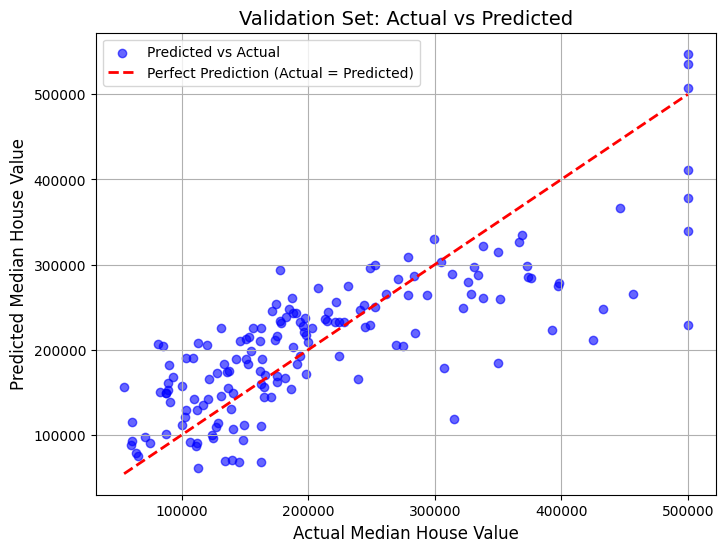

In [102]:
# --- Plot Actual vs. Predicted for the Validation Set ---
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction (Actual = Predicted)')
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.title('Validation Set: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2.4 Model 2: Decision Tree Regressor (Baseline Model)

In [103]:
# -------------------- Hyperparameter Tuning for Decision Tree Regressor --------------------
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'absolute_error']
}
decision_tree = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X_train_processed, y_train)

# Get the best parameters and score
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-validation Score (Negative MSE):", grid_search_dt.best_score_)


Best Hyperparameters for Decision Tree: {'criterion': 'absolute_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-validation Score (Negative MSE): -5827310712.028694


In [104]:
# Initialize the Decision Tree Regressor with best hyperparameters
best_decision_tree = grid_search_dt.best_estimator_

# Train on the full training data and predict on the validation set
y_val_pred_dt_best = best_decision_tree.predict(X_val_processed)

# Calculate evaluation metrics
val_mse_dt_best = mean_squared_error(y_val, y_val_pred_dt_best)
val_rmse_dt_best = np.sqrt(val_mse_dt_best)
val_r2_dt_best = r2_score(y_val, y_val_pred_dt_best)

# Display the evaluation results
print("\n--- Best Decision Tree Regressor Evaluation (Validation Set) ---")
print(f"Validation Set - MSE: {val_mse_dt_best:.2f}, RMSE: {val_rmse_dt_best:.2f}, R² Score: {val_r2_dt_best:.4f}")



--- Best Decision Tree Regressor Evaluation (Validation Set) ---
Validation Set - MSE: 5000075130.27, RMSE: 70711.21, R² Score: 0.5916


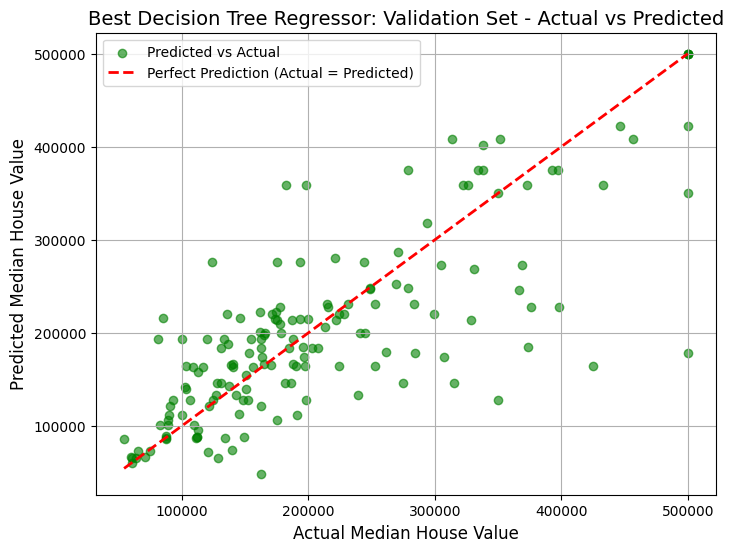

In [105]:
# --- Plot Actual vs. Predicted for the Validation Set ---
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_dt_best, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction (Actual = Predicted)')
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.title('Best Decision Tree Regressor: Validation Set - Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2.5 Model 3: Random Forest Regressor (Main Model)

In [106]:
# Scaled data
X_train_rf = X_train_processed
X_val_rf = X_val_processed
X_test_rf = X_test_processed


In [107]:
# -------------------- Hyperparameter Tuning for Random Forest Regressor --------------------
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 15, 20, None]

}

# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search on the training data
grid_search_rf.fit(X_train_processed, y_train)

# Get the best hyperparameters and the best score
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-validation Score (Negative MSE):", grid_search_rf.best_score_)

Best Hyperparameters for Random Forest: {'max_depth': 15, 'n_estimators': 200}
Best Cross-validation Score (Negative MSE): -4365747377.031129


In [108]:
# Initialize the best Random Forest Regressor with the best hyperparameters
best_rf = grid_search_rf.best_estimator_

# Train the best model and make predictions on the validation set
y_val_pred_rf = best_rf.predict(X_val_processed)

# Calculate evaluation metrics
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

# Display the results
print("\n--- Random Forest Regressor (Best Model) Evaluation (Validation Set) ---")
print(f"Validation Set - MSE: {val_mse_rf:.2f}, RMSE: {val_rmse_rf:.2f}, R² Score: {val_r2_rf:.4f}")



--- Random Forest Regressor (Best Model) Evaluation (Validation Set) ---
Validation Set - MSE: 3189311608.11, RMSE: 56473.99, R² Score: 0.7395


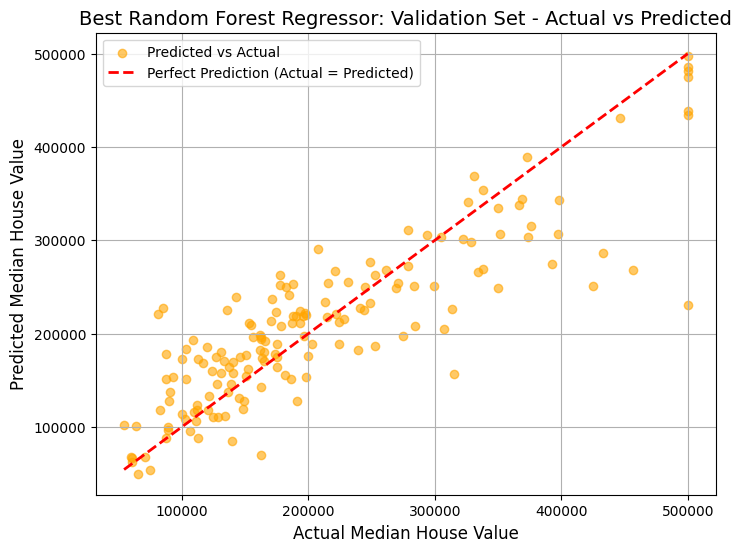

In [109]:
# Plot Actual vs. Predicted for the Validation Set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred_rf, alpha=0.6, color='orange', label='Predicted vs Actual')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction (Actual = Predicted)')
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.title('Best Random Forest Regressor: Validation Set - Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2.6 Comparing Model Performance using Validation Data Sets

In [110]:
# Collect evaluation metrics from each model

# Linear Regression Metrics (Validation Set)
linear_metrics = {
    "Model": "Linear Regression",
    "MSE": val_mse_lr,
    "RMSE": val_rmse_lr,
    "R² Score": val_r2_lr
}

# Decision Tree Regressor Metrics (Validation Set)
decision_tree_metrics = {
    "Model": "Decision Tree Regressor",
    "MSE": val_mse_dt_best,
    "RMSE": val_rmse_dt_best,
    "R² Score": val_r2_dt_best
}

# Random Forest Regressor Metrics (Validation Set)
random_forest_metrics = {
    "Model": "Random Forest Regressor",
    "MSE": val_mse_rf,
    "RMSE": val_rmse_rf,
    "R² Score": val_r2_rf
}

In [111]:
# Create a DataFrame to compare all models
comparison_df = pd.DataFrame([linear_metrics, decision_tree_metrics, random_forest_metrics])

# Display the comparison table
print("\n--- Model Comparison (Validation Set) ---")
print(comparison_df.to_string(index=False))


--- Model Comparison (Validation Set) ---
                  Model          MSE         RMSE  R² Score
      Linear Regression 4.657009e+09 68242.278052  0.619626
Decision Tree Regressor 5.000075e+09 70711.209368  0.591605
Random Forest Regressor 3.189312e+09 56473.990545  0.739504


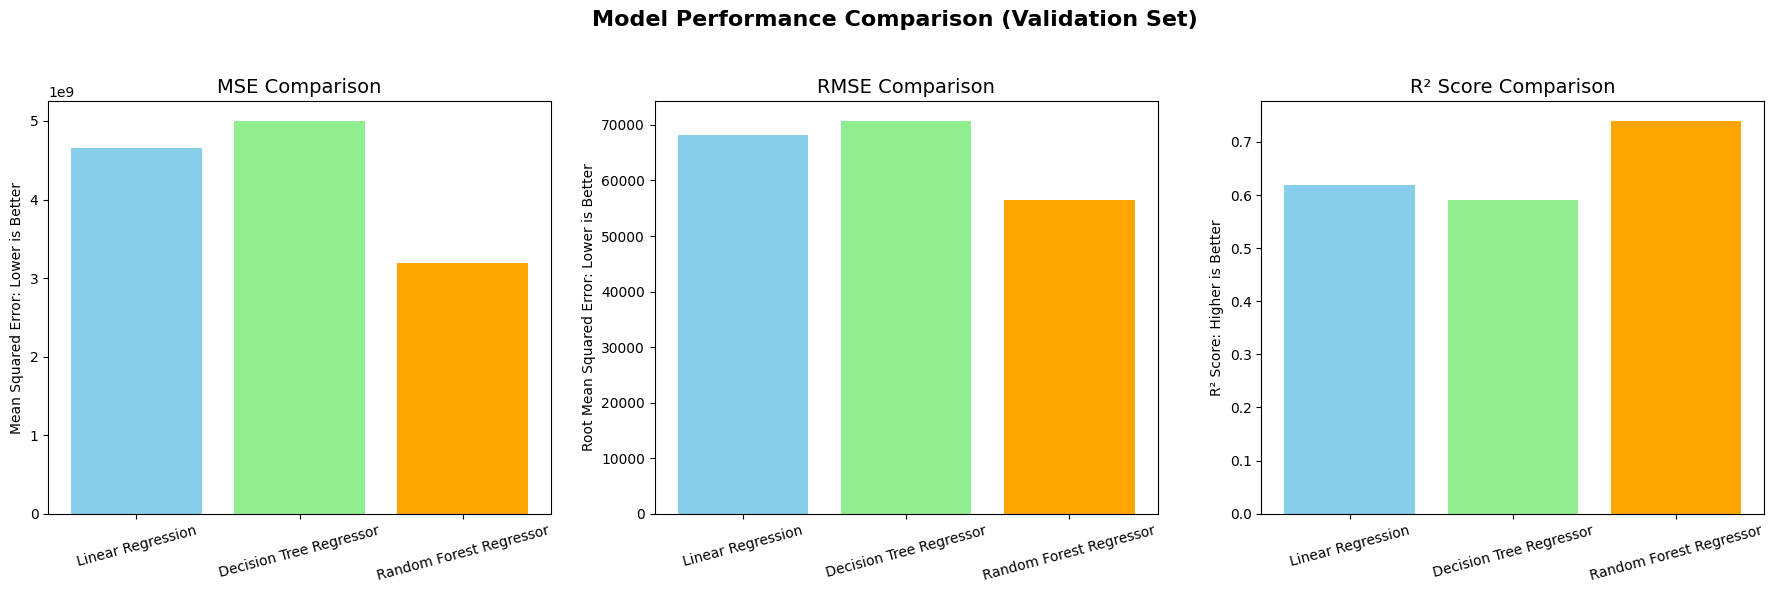

In [112]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: MSE Comparison
axes[0].bar(comparison_df['Model'], comparison_df['MSE'], color=['skyblue', 'lightgreen', 'orange'])
axes[0].set_title('MSE Comparison', fontsize=14)
axes[0].set_ylabel('Mean Squared Error: Lower is Better')
axes[0].tick_params(axis='x', rotation=15)


# Plot 2: RMSE Comparison
axes[1].bar(comparison_df['Model'], comparison_df['RMSE'], color=['skyblue', 'lightgreen', 'orange'])
axes[1].set_title('RMSE Comparison', fontsize=14)
axes[1].set_ylabel('Root Mean Squared Error: Lower is Better')
axes[1].tick_params(axis='x', rotation=15)

# Plot 3: R² Score Comparison
axes[2].bar(comparison_df['Model'], comparison_df['R² Score'], color=['skyblue', 'lightgreen', 'orange'])
axes[2].set_title('R² Score Comparison', fontsize=14)
axes[2].set_ylabel('R² Score: Higher is Better')
axes[2].tick_params(axis='x', rotation=15)

plt.suptitle('Model Performance Comparison (Validation Set)', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2.7 Evaluate Random Forest Regressor on Test Dataset


In [113]:
# Make predictions on the test set using the best Random Forest model
y_test_pred_rf = best_rf.predict(X_test_processed)

# Calculate evaluation metrics for the test set
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Display the results for the test set
print("\n--- Random Forest Regressor (Best Model) Evaluation (Test Set) ---")
print(f"Test Set - MSE: {test_mse_rf:.2f}, RMSE: {test_rmse_rf:.2f}, R² Score: {test_r2_rf:.4f}")



--- Random Forest Regressor (Best Model) Evaluation (Test Set) ---
Test Set - MSE: 5580499025.79, RMSE: 74702.74, R² Score: 0.6606


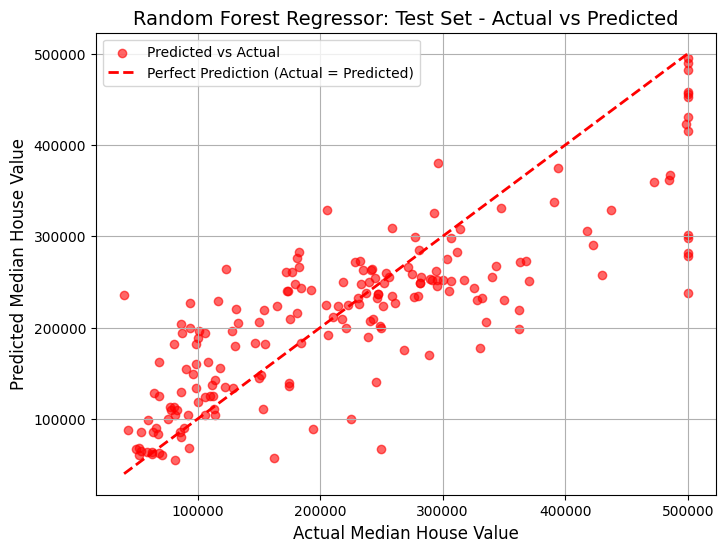

In [115]:
# Plot Actual vs. Predicted for the Test Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.6, color='red', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction (Actual = Predicted)')
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.title('Random Forest Regressor: Test Set - Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


# **3.0 Classification Task Using Titanic Dataset**

# 3.1 Importing Dataset From GitHub


In [116]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/Amoshb/COMP1816-ML-Datasets/refs/heads/main/COMP1816_Titanic_Dataset_Classification.csv")

In [117]:
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket No.,Fare,Embarked,Survival
0,1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0
1,2,1.0,NaN,female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0
2,3,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0
4,5,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0


In [118]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       880 non-null    float64
 2   Name         885 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          715 non-null    float64
 5   SibSp        888 non-null    float64
 6   Parch        888 non-null    float64
 7   Ticket No.   888 non-null    object 
 8   Fare         888 non-null    float64
 9   Embarked     884 non-null    object 
 10  Survival     886 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 76.6+ KB


# 3.2 Data Preprocessing


In [119]:

# Fill missing numerical values with the median
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_titanic[num_cols] = df_titanic[num_cols].fillna(df_titanic[num_cols].median())

# Fill missing categorical values with the mode
cat_cols = ['Embarked', 'Sex']
df_titanic[cat_cols] = df_titanic[cat_cols].fillna(df_titanic[cat_cols].mode().iloc[0])

# Fill missing target variable with the mode
df_titanic['Survival'] = df_titanic['Survival'].fillna(df_titanic['Survival'].mode()[0])


In [120]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       890 non-null    float64
 2   Name         885 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          890 non-null    float64
 5   SibSp        890 non-null    float64
 6   Parch        890 non-null    float64
 7   Ticket No.   888 non-null    object 
 8   Fare         890 non-null    float64
 9   Embarked     890 non-null    object 
 10  Survival     890 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 76.6+ KB


In [121]:
# Encode categorical variables
label_enc = LabelEncoder()
df_titanic['Sex'] = label_enc.fit_transform(df_titanic['Sex'])
df_titanic['Embarked'] = label_enc.fit_transform(df_titanic['Embarked'])

In [122]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_titanic[features]
y = df_titanic['Survival']

In [124]:
# -------------------- Dataset Splitting --------------------
# Split dataset: Last 140 rows for test set (as per coursework instruction)
X_train_full, X_test, y_train_full, y_test = X.iloc[:-140], X.iloc[-140:], y.iloc[:-140], y.iloc[-140:]

# Further split training set into training & validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [125]:
# Standardize numerical features
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_val.loc[:, num_cols] = scaler.transform(X_val[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


# 3.3 Model 1: Logistic Regression (Baseline Model)


In [126]:
# -------------------- Hyperparameter Tuning for Logistic Regression --------------------
param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs', 'saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1], 'solver': ['saga'], 'l1_ratio': [0.3, 0.5, 0.7]}
]
# Initialize Logistic Regression and GridSearchCV
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs', 'saga']},
                         {'C': [0.01, 0.1, 1], 'l1_ratio': [0.3, 0.5, 0.7],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy', verbose=2)

In [127]:
# Retrieve best parameters and best model
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [128]:
# Validation Set Evaluation
y_val_pred = best_logistic_model.predict(X_val)
acc_log_reg_val = accuracy_score(y_val, y_val_pred)
prec_log_reg_val = precision_score(y_val, y_val_pred)
rec_log_reg_val = recall_score(y_val, y_val_pred)
f1_log_reg_val = f1_score(y_val, y_val_pred)
print("--- Logistic Regression (Validation Set) ---")
print(f"Accuracy: {acc_log_reg_val:.2f}, Precision: {prec_log_reg_val:.2f}, Recall: {rec_log_reg_val:.2f}, F1-Score: {f1_log_reg_val:.2f}")


--- Logistic Regression (Validation Set) ---
Accuracy: 0.79, Precision: 0.88, Recall: 0.63, F1-Score: 0.74


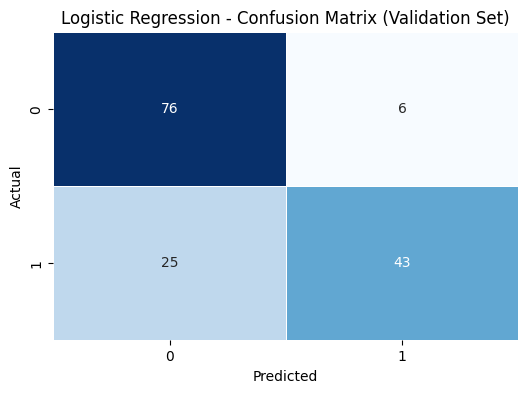

In [129]:
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Logistic Regression - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3.4 Model 2: Decision Tree Classifier (Baseline Model)


In [130]:
# -------------------- Hyperparameter Tuning for Decision Tree --------------------
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
print("\nBest Hyperparameters (Decision Tree):", grid_search_dt.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Hyperparameters (Decision Tree): {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [131]:
# Validation Set
y_val_pred_dt = best_dt.predict(X_val)
acc_val_dt = accuracy_score(y_val, y_val_pred_dt)
prec_val_dt = precision_score(y_val, y_val_pred_dt)
rec_val_dt = recall_score(y_val, y_val_pred_dt)
f1_val_dt = f1_score(y_val, y_val_pred_dt)
print("--- Decision Tree (Validation Set) ---")
print(f"Accuracy: {acc_val_dt:.2f}, Precision: {prec_val_dt:.2f}, Recall: {rec_val_dt:.2f}, F1-Score: {f1_val_dt:.2f}")



--- Decision Tree (Validation Set) ---
Accuracy: 0.78, Precision: 0.91, Recall: 0.57, F1-Score: 0.70


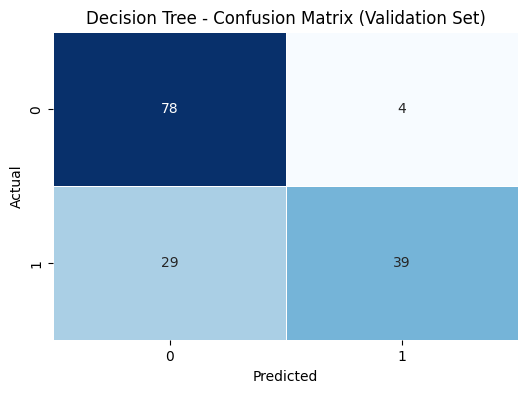

In [132]:

# Validation Set Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Decision Tree - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3.5 Model 3: Random Forest Classifier (Main Model)


In [133]:
# -------------------- Hyperparameter Tuning for Random Forest (Main Model) --------------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters (Random Forest):", grid_search_rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Hyperparameters (Random Forest): {'max_depth': 5, 'n_estimators': 200}


In [134]:
# Validation Set
y_val_pred_rf = best_rf.predict(X_val)
acc_val_rf = accuracy_score(y_val, y_val_pred_rf)
prec_val_rf = precision_score(y_val, y_val_pred_rf)
rec_val_rf = recall_score(y_val, y_val_pred_rf)
f1_val_rf = f1_score(y_val, y_val_pred_rf)

print("--- Random Forest (Validation Set) ---")
print(f"Accuracy: {acc_val_rf:.2f}, Precision: {prec_val_rf:.2f}, Recall: {rec_val_rf:.2f}, F1-Score: {f1_val_rf:.2f}")


--- Random Forest (Validation Set) ---
Accuracy: 0.80, Precision: 0.95, Recall: 0.59, F1-Score: 0.73


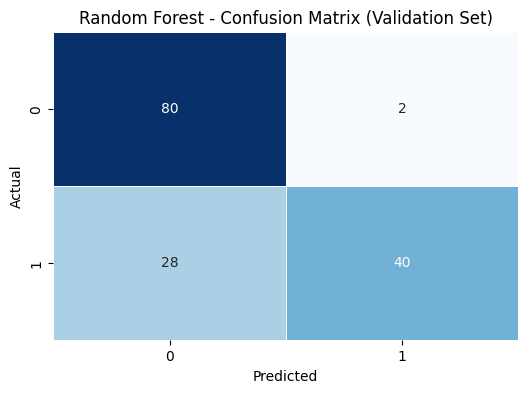

In [135]:

# Validation Set Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Random Forest - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3.6 Comparing Model Performance Using Validation Dataset


In [136]:
comparison_dict = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [acc_log_reg_val, acc_val_dt, acc_val_rf],
    "Precision": [prec_log_reg_val, prec_val_dt, prec_val_rf],
    "Recall": [rec_log_reg_val, rec_val_dt, rec_val_rf],
    "F1-Score": [f1_log_reg_val, f1_val_dt, f1_val_rf]
}



In [137]:
# Create DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print("Model Performance Comparison Table:")
display(comparison_df)


Model Performance Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.793333,0.877551,0.632353,0.735043
1,Decision Tree,0.780000,0.906977,0.573529,0.702703
2,Random Forest,0.800000,0.952381,0.588235,0.727273


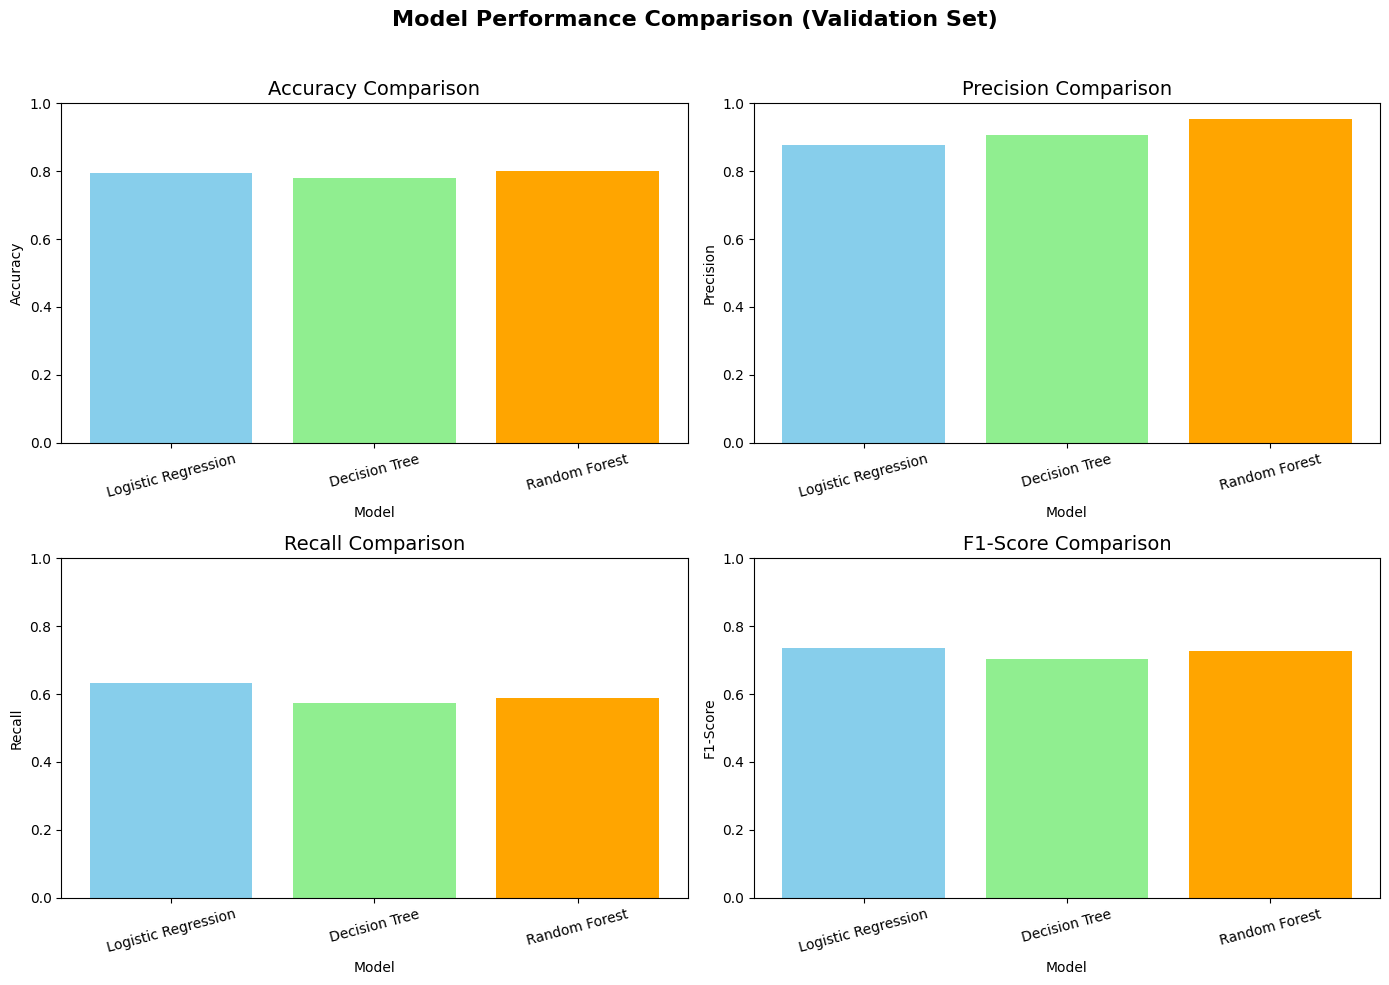

In [138]:
# -------------------- Bar Chart Plot --------------------
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, metric in enumerate(metrics):
    axes[i].bar(comparison_dict["Model"], comparison_dict[metric], color=["skyblue", "lightgreen", "orange"])
    axes[i].set_title(f"{metric} Comparison", fontsize=14)
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel("Model")
    axes[i].tick_params(axis='x', rotation=15)

plt.suptitle("Model Performance Comparison (Validation Set)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3.7 Evaluate Random Forest Classifier on Test Dataset


In [139]:
# Predict using the test set
y_test_pred_rf = best_rf.predict(X_test)

# Calculate evaluation metrics
acc_test_rf = accuracy_score(y_test, y_test_pred_rf)
prec_test_rf = precision_score(y_test, y_test_pred_rf)
rec_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

# Print evaluation metrics
print("--- Random Forest Classifier (Test Set) ---")
print(f"Accuracy: {acc_test_rf:.2f}")
print(f"Precision: {prec_test_rf:.2f}")
print(f"Recall: {rec_test_rf:.2f}")
print(f"F1-Score: {f1_test_rf:.2f}")


--- Random Forest Classifier (Test Set) ---
Accuracy: 0.87
Precision: 0.92
Recall: 0.70
F1-Score: 0.80


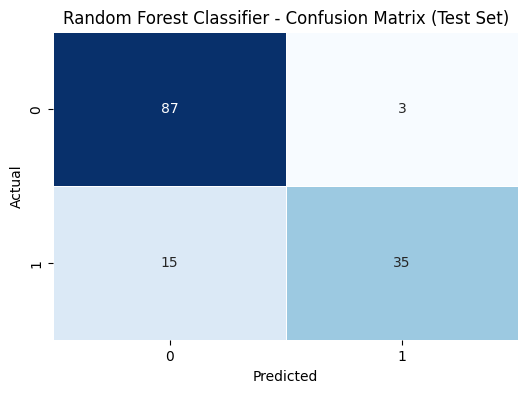

In [140]:

cm_test = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title("Random Forest Classifier - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()